## K Means Clustering

importing required modules

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("income.csv")

In [3]:
df

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


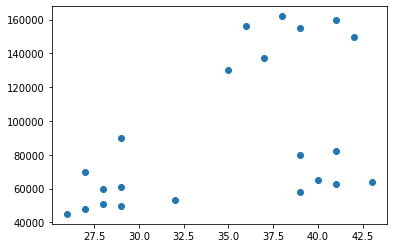

In [4]:
plt.scatter(df.Age,df.Income)

In [5]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [6]:
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [7]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


No handles with labels found to put in legend.


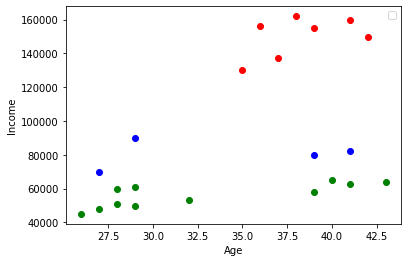

In [8]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1.Income,color='red')
plt.scatter(df2.Age,df2.Income,color='green')
plt.scatter(df3.Age,df3.Income,color='blue')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

Above image depicts grouping is not done properly by the algorithm<br>
Reason behind it is bad scaling

In [9]:
scaler = MinMaxScaler()

Scaling and Transforming features into 0 to 1 range

In [10]:
scaler.fit(df[['Income']])
df[['Income']]=scaler.transform(df[['Income']])

In [11]:
df.head()

,Name,Age,Income,cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,1
3,Ismail,28,0.128205,1
4,Kory,42,0.897436,0


In [12]:
scaler.fit(df[['Age']])
df[['Age']]=scaler.transform(df[['Age']])

In [13]:
df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


Scaling done!!<br>
Now, applying K Means once again

In [14]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [15]:
df['cluster']=y_predicted
df

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


No handles with labels found to put in legend.


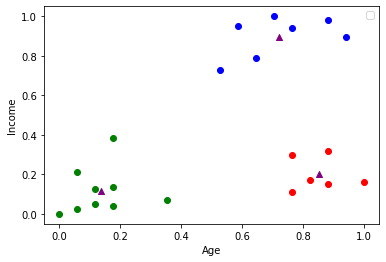

In [16]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1.Income,color='red')
plt.scatter(df2.Age,df2.Income,color='green')
plt.scatter(df3.Age,df3.Income,color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='^')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

This clustering seemsssss very good😋😄

In [17]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [18]:
k_range = range(1,10)
sse = []  #sum of square error
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)

In [19]:
sse 

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.22020960864009395,
 0.18311629202780538,
 0.14087951725103112,
 0.10383752586603562]

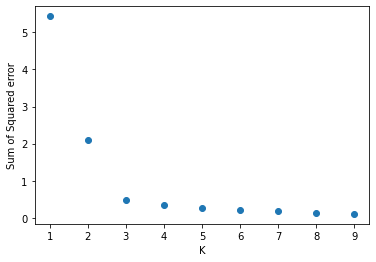

In [22]:
plt.xlabel("K")
plt.ylabel("Sum of Squared error")
plt.scatter(k_range,sse)